In [2]:
import pandas as pd

df = pd.read_csv('지산매물데이터.csv')

df.head(2)

,지역,물건번호,상가구분,월세,보증금,평당월세,계약면적,전용면적,지번주소,위도,...,전체층,속한지산이름,클러스터,지산이름_정제,center_name,subway_score,bank_score,road_score,infra_score,center_name_정제
0,강원특별자치도 원주시 반곡동,2528873558,지식산업센터,40,500.0,1.11,56,36.18,강원특별자치도 원주시 반곡동 1809-11,37.327746,...,15,엔터비즈타워,5,엔터비즈타워,엔터비즈타워,0.0,20.0,80.645161,100.645161,엔터비즈타워
1,강원특별자치도 원주시 반곡동,2528886552,지식산업센터,40,500.0,1.04,76,38.49,강원특별자치도 원주시 반곡동 1809-11,37.327746,...,15,엔터비즈타워,5,엔터비즈타워,엔터비즈타워,0.0,20.0,80.645161,100.645161,엔터비즈타워


In [18]:
print(df.columns.tolist())

['지역', '물건번호', '상가구분', '월세', '보증금', '평당월세', '계약면적', '전용면적', '지번주소', '위도', '경도', 'region', 'C_min', 'C_max', '전세금(J)', 'P_min', 'P_max', '예상 매매가', '단위 면적당 매매가', '층', '전체층', '속한지산이름', '클러스터', '지산이름_정제', 'center_name', 'subway_score', 'bank_score', 'road_score', 'infra_score', 'center_name_정제']


PCA( ['infra_score'] ) 1차 주성분 설명력: 100.00%


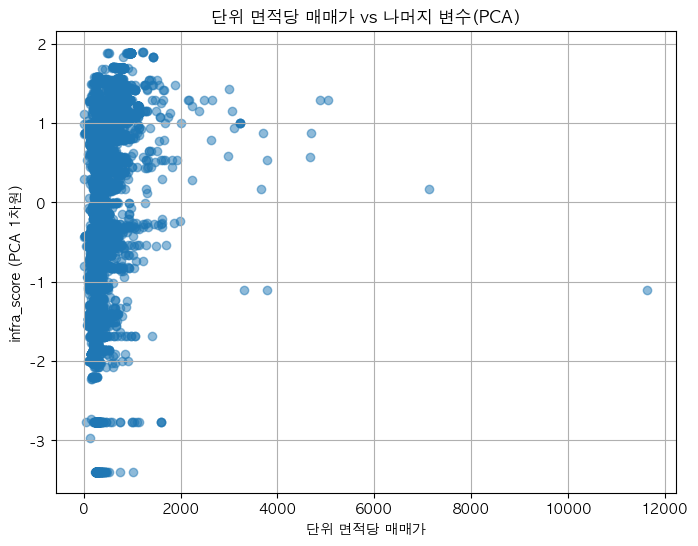

In [5]:
import pandas as pd
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
df = pd.read_csv('지산매물데이터.csv')
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
# infra_score 새로 계산
df['infra_score'] = (
    0.5 * df['subway_score'].fillna(0) +
    0.1 * df['bank_score'].fillna(0) +
    0.4 * df['road_score'].fillna(0)
)
# 사용할 변수 선택
cols = ['월세', '보증금', '평당월세', '전용면적','예상 매매가', '단위 면적당 매매가', 'subway_score', 'bank_score', 'road_score', 'infra_score']
df_pca = df[cols].replace([np.inf, -np.inf], pd.NA).dropna()

# x축: 단위 면적당 매매가
x = df_pca['단위 면적당 매매가'].values




# y축: 나머지 2개 변수만 PCA 1차원으로 축소
other_cols = [ 'infra_score' ]
scaler_y = StandardScaler()
X_y = scaler_y.fit_transform(df_pca[other_cols])
pca_y = PCA(n_components=1)
y = pca_y.fit_transform(X_y).flatten()

# 설명력(분산 비율) 확인
explained_var = pca_y.explained_variance_ratio_[0]
print(f"PCA( {other_cols} ) 1차 주성분 설명력: {explained_var*100:.2f}%")
# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('단위 면적당 매매가')
plt.ylabel('infra_score (PCA 1차원)')
plt.title('단위 면적당 매매가 vs 나머지 변수(PCA)')
plt.grid(True)
plt.show()

PCA( ['subway_score', 'bank_score', 'road_score'] ) 1차 주성분 설명력: 51.02%


C:\Users\santa\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


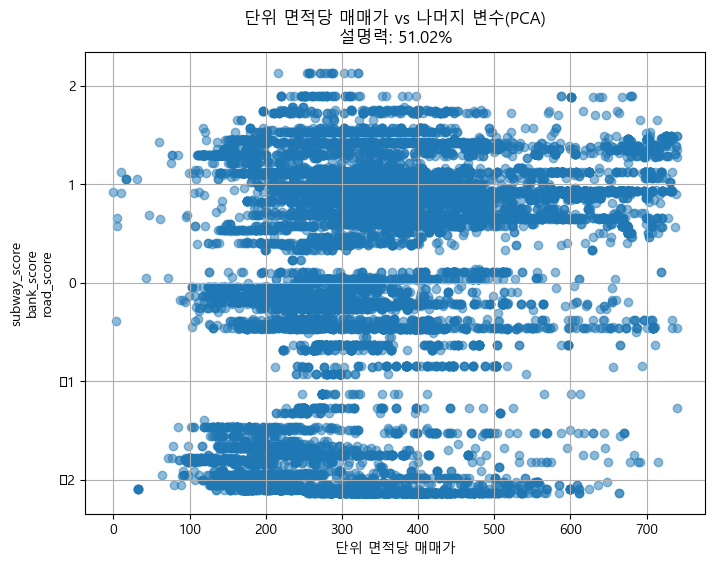

In [27]:
import pandas as pd
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
df = pd.read_csv('지산매물데이터.csv')

# infra_score 새로 계산
df['infra_score'] = (
    0.5 * df['subway_score'].fillna(0) +
    0.1 * df['bank_score'].fillna(0) +
    0.4 * df['road_score'].fillna(0)
)
# 사용할 변수 선택
cols = ['단위 면적당 매매가', 'subway_score','bank_score', 'road_score',  '전용면적','infra_score']
df_pca = df[cols].replace([np.inf, -np.inf], pd.NA).dropna()

# 이상치 제거 (IQR 방법, 단위 면적당 매매가 기준)
Q1 = df_pca['단위 면적당 매매가'].quantile(0.25)
Q3 = df_pca['단위 면적당 매매가'].quantile(0.75)
IQR = Q3 - Q1
mask = (df_pca['단위 면적당 매매가'] >= Q1 - 1.5 * IQR) & (df_pca['단위 면적당 매매가'] <= Q3 + 1.5 * IQR)
df_pca = df_pca[mask]

# x축: 단위 면적당 매매가
x = df_pca['단위 면적당 매매가'].values

# y축: 나머지 3개 변수만 PCA 1차원으로 축소
other_cols = [ 'subway_score','bank_score', 'road_score' ]
scaler_y = StandardScaler()
X_y = scaler_y.fit_transform(df_pca[other_cols])
pca_y = PCA(n_components=1)
y = pca_y.fit_transform(X_y).flatten()

# 설명력(분산 비율) 확인
explained_var = pca_y.explained_variance_ratio_[0]
print(f"PCA( {other_cols} ) 1차 주성분 설명력: {explained_var*100:.2f}%")
# 시각화
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('단위 면적당 매매가')
plt.ylabel('\n'.join(other_cols))
plt.title(f'단위 면적당 매매가 vs 나머지 변수(PCA)\n설명력: {explained_var*100:.2f}%')
plt.grid(True)
plt.show()

In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
df = pd.read_csv('지산매물데이터.csv')

# infra_score 새로 계산
df['infra_score'] = (
    0.5 * df['subway_score'].fillna(0) +
    0.1 * df['bank_score'].fillna(0) +
    0.4 * df['road_score'].fillna(0)
)

# 사용할 변수 전체 목록 (x축 변수 제외)
all_vars = ['월세', '보증금', '평당월세', '전용면적', '예상 매매가', 'subway_score', 'bank_score', 'road_score', 'infra_score']
all_vars = [v for v in all_vars if v in df.columns and v != '단위 면적당 매매가']

# 결과 저장
results = []

for y_vars in combinations(all_vars, 2):
    cols = ['단위 면적당 매매가'] + list(y_vars)
    df_pca = df[cols].replace([np.inf, -np.inf], pd.NA).dropna()
    if len(df_pca) < 10:  # 데이터가 너무 적으면 스킵
        continue
    scaler_y = StandardScaler()
    X_y = scaler_y.fit_transform(df_pca[list(y_vars)])
    pca_y = PCA(n_components=1)
    y = pca_y.fit_transform(X_y).flatten()
    explained_var = pca_y.explained_variance_ratio_[0]
    results.append((y_vars, explained_var))
    print(f"{y_vars} 설명력: {explained_var*100:.2f}%")

# 설명력이 가장 큰 변수 조합 찾기
best = max(results, key=lambda x: x[1])
print("\n설명력이 가장 큰 변수 조합:", best[0], f"({best[1]*100:.2f}%)")

('월세', '보증금') 설명력: 97.31%
('월세', '평당월세') 설명력: 65.47%
('월세', '전용면적') 설명력: 54.44%
('월세', '예상 매매가') 설명력: 99.98%
('월세', 'subway_score') 설명력: 57.54%
('월세', 'bank_score') 설명력: 56.79%
('월세', 'road_score') 설명력: 52.65%
('월세', 'infra_score') 설명력: 51.51%
('보증금', '평당월세') 설명력: 65.37%
('보증금', '전용면적') 설명력: 54.02%
('보증금', '예상 매매가') 설명력: 97.53%
('보증금', 'subway_score') 설명력: 57.19%
('보증금', 'bank_score') 설명력: 56.52%
('보증금', 'road_score') 설명력: 52.56%
('보증금', 'infra_score') 설명력: 51.89%
('평당월세', '전용면적') 설명력: 50.55%
('평당월세', '예상 매매가') 설명력: 65.12%
('평당월세', 'subway_score') 설명력: 65.80%
('평당월세', 'bank_score') 설명력: 61.21%
('평당월세', 'road_score') 설명력: 57.82%
('평당월세', 'infra_score') 설명력: 63.95%
('전용면적', '예상 매매가') 설명력: 54.45%
('전용면적', 'subway_score') 설명력: 50.53%
('전용면적', 'bank_score') 설명력: 50.66%
('전용면적', 'road_score') 설명력: 50.28%
('전용면적', 'infra_score') 설명력: 50.32%
('예상 매매가', 'subway_score') 설명력: 57.33%
('예상 매매가', 'bank_score') 설명력: 56.66%
('예상 매매가', 'road_score') 설명력: 52.56%
('예상 매매가', 'infra_score') 설명력: 51.29%
('s

In [2]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
df = pd.read_csv('지산매물데이터.csv')

# infra_score 새로 계산
df['infra_score'] = (
    0.5 * df['subway_score'].fillna(0) +
    0.1 * df['bank_score'].fillna(0) +
    0.4 * df['road_score'].fillna(0)
)

# 사용할 변수 전체 목록 (x축 변수 제외)
all_vars = ['월세', '보증금', '평당월세', '전용면적', '예상 매매가', 'subway_score', 'bank_score', 'road_score', 'infra_score']
all_vars = [v for v in all_vars if v in df.columns and v != '단위 면적당 매매가']

# 결과 저장
results = []

for y_vars in combinations(all_vars, 3):
    cols = ['단위 면적당 매매가'] + list(y_vars)
    df_pca = df[cols].replace([np.inf, -np.inf], pd.NA).dropna()
    if len(df_pca) < 10:  # 데이터가 너무 적으면 스킵
        continue
    scaler_y = StandardScaler()
    X_y = scaler_y.fit_transform(df_pca[list(y_vars)])
    pca_y = PCA(n_components=1)
    y = pca_y.fit_transform(X_y).flatten()
    explained_var = pca_y.explained_variance_ratio_[0]
    results.append((y_vars, explained_var))
    print(f"{y_vars} 설명력: {explained_var*100:.2f}%")

# 설명력이 가장 큰 변수 조합 찾기
best = max(results, key=lambda x: x[1])
print("\n설명력이 가장 큰 변수 조합:", best[0], f"({best[1]*100:.2f}%)")

('월세', '보증금', '평당월세') 설명력: 70.55%
('월세', '보증금', '전용면적') 설명력: 65.37%
('월세', '보증금', '예상 매매가') 설명력: 97.70%
('월세', '보증금', 'subway_score') 설명력: 65.73%
('월세', '보증금', 'bank_score') 설명력: 65.47%
('월세', '보증금', 'road_score') 설명력: 64.44%
('월세', '보증금', 'infra_score') 설명력: 64.96%
('월세', '평당월세', '전용면적') 설명력: 43.97%
('월세', '평당월세', '예상 매매가') 설명력: 72.03%
('월세', '평당월세', 'subway_score') 설명력: 51.31%
('월세', '평당월세', 'bank_score') 설명력: 49.01%
('월세', '평당월세', 'road_score') 설명력: 46.29%
('월세', '평당월세', 'infra_score') 설명력: 47.73%
('월세', '전용면적', '예상 매매가') 설명력: 67.17%
('월세', '전용면적', 'subway_score') 설명력: 39.27%
('월세', '전용면적', 'bank_score') 설명력: 38.89%
('월세', '전용면적', 'road_score') 설명력: 36.78%
('월세', '전용면적', 'infra_score') 설명력: 36.53%
('월세', '예상 매매가', 'subway_score') 설명력: 68.06%
('월세', '예상 매매가', 'bank_score') 설명력: 67.81%
('월세', '예상 매매가', 'road_score') 설명력: 66.83%
('월세', '예상 매매가', 'infra_score') 설명력: 66.71%
('월세', 'subway_score', 'bank_score') 설명력: 53.24%
('월세', 'subway_score', 'road_score') 설명력: 38.93%
('월세', 'subway_sc